In [213]:
# Add Matplotlib inline magic command
%matplotlib inline

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

In [214]:
# Files to load
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

In [215]:
# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

In [216]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


Deliverable 1: Get a Summary DataFrame

1. Get the total rides for each city type
2. Get the total drivers for each city type
3. Get the total amount of fares for each city type
4. Get the average fare per ride for each city type. 
5. Get the average fare per driver for each city type.
6. Create a PyBer summary DataFrame. 

In [217]:
total_rides = pyber_data_df.groupby(["type"]).count()["ride_id"]

In [218]:
total_drivers = city_data_df.groupby(["type"]).sum()["driver_count"]

In [219]:
total_fares = pyber_data_df.groupby(["type"]).sum()["fare"]

In [220]:
avg_fare_per_ride = (pyber_data_df.groupby(["type"]).sum()["fare"])/(pyber_data_df.groupby(["type"]).count()["ride_id"])

In [221]:
avg_fare_per_driver = (pyber_data_df.groupby(["type"]).sum()["fare"])/(city_data_df.groupby(["type"]).sum()["driver_count"])

In [222]:
pyber_summary_df = pd.DataFrame({
    "Total Rides": total_rides,
    "Total Drivers": total_drivers,
    "Total Fares": total_fares,
    "Average Fare per Ride": avg_fare_per_ride,
    "Average Fare per Driver": avg_fare_per_driver,
})

pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
type,,,,,
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


7. Cleaning up the DataFrame. Delete the index name

In [223]:
pyber_summary_df.index.name = None

8. Format the columns.

In [224]:
pyber_summary_df["Total Fares"] = pyber_summary_df["Total Fares"].map("${:,.2f}".format)

In [225]:
pyber_summary_df["Average Fare per Ride"] = pyber_summary_df["Average Fare per Ride"].map("${:,.2f}".format)

In [226]:
pyber_summary_df["Average Fare per Driver"] = pyber_summary_df["Average Fare per Driver"].map("${:,.2f}".format)

In [227]:
pyber_summary_df["Total Drivers"] = pyber_summary_df["Total Drivers"].map("{:,}".format)

Deliverable 2: Create a multiple line plot that shows the total weekly fares for each type of city. 

1. Read the merged DataFrame

In [228]:
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,1625,"2,405","$39,854.38",$24.53,$16.57


2. Using groupby(), create a new DataFrame showing the sum of the fares for each date where the indices are the city type and date.

In [229]:
date_fare_df = pyber_data_df.groupby(["type", "date"]).sum()["fare"]

date_fare_df

type   date               
Rural  2019-01-01 09:45:36    43.69
       2019-01-02 11:18:32    52.12
       2019-01-03 19:51:01    19.90
       2019-01-04 03:31:26    24.88
       2019-01-06 07:38:40    47.33
                              ...  
Urban  2019-05-08 04:20:00    21.99
       2019-05-08 04:39:49    18.45
       2019-05-08 07:29:01    18.55
       2019-05-08 11:38:35    19.77
       2019-05-08 13:10:18    18.04
Name: fare, Length: 2375, dtype: float64

3. Reset the index on the DataFrame you created. This is needed to use the 'pivot()' function.


In [230]:
date_fare_df = date_fare_df.reset_index()

4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' to get the total fares for each type of city by the date. 

In [231]:
date_fare_df.pivot(index="date", columns="type", values="fare")

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-05-08 04:20:00,NaN,NaN,21.99
2019-05-08 04:39:49,NaN,NaN,18.45
2019-05-08 07:29:01,NaN,NaN,18.55


5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.

In [232]:
date_df = date_fare_df.pivot(index="date", columns="type", values="fare").loc["2019-01-01" : "2019-04-29"]
date_df

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-04-28 14:28:36,NaN,NaN,11.46
2019-04-28 16:29:16,NaN,NaN,36.42
2019-04-28 17:26:52,NaN,NaN,31.43


6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
df.index = pd.to_datetime(df.index)

In [233]:
date_df.index = pd.to_datetime(date_df.index)

7. Check that the datatype for the index is datetime using df.info()

In [234]:
date_df.info

<bound method DataFrame.info of type                 Rural  Suburban  Urban
date                                       
2019-01-01 00:08:16    NaN       NaN  37.91
2019-01-01 00:46:46    NaN     47.74    NaN
2019-01-01 02:07:24    NaN     24.07    NaN
2019-01-01 03:46:50    NaN       NaN   7.57
2019-01-01 05:23:21    NaN       NaN  10.75
...                    ...       ...    ...
2019-04-28 14:28:36    NaN       NaN  11.46
2019-04-28 16:29:16    NaN       NaN  36.42
2019-04-28 17:26:52    NaN       NaN  31.43
2019-04-28 17:38:09    NaN     34.87    NaN
2019-04-28 19:35:03    NaN     16.96    NaN

[2196 rows x 3 columns]>

8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.

In [235]:
new_date_df = date_df.resample("W").sum()

In [236]:
new_date_df

type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


9. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 

In [237]:
from matplotlib import style

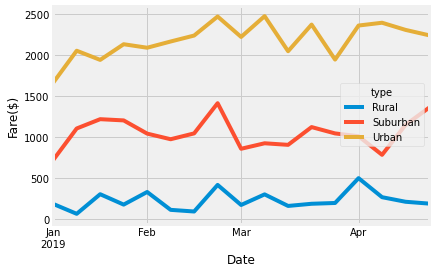

In [238]:
new_date_df.plot()
plt.xlabel("Date")
plt.ylabel("Fare($)")
style.use('fivethirtyeight')
plt.savefig("pyber_fare_summary.png")